# Investigate Titanic Dataset

### Overview

RMS Titanic's sinking was one of the worst maritime disasters in modern history. With the dataset obtained from [Kaggle](https://www.kaggle.com/c/titanic/data), we can now garner some insights about the passengers on board the ship. In this project, we will examine the Titanic dataset and try to answer the following questions:

*Were all passengers on board equally likely to survive? If not, what were some characteristics for people who survived compared with people who didn't?*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Getting and Examing the Data

The dataset has been loaded to the same folder. Now let's read in the data and prepare the data for later analysis.

In [2]:
titanic = pd.read_csv("titanic-data.csv")
# Now take a look at the first several columns
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
# Filter out the rows that have values for 'Age' column
len(titanic[~titanic.Age.isnull()])
#len(titanic.dropna(subset=['Age'], inplace=False))

714

In [5]:
# Let's start by converting all the column names to the standard lower-case names
titanic.rename(columns = lambda x: x.lower(), inplace = True)
titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Summary statistics about the dataset
titanic.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


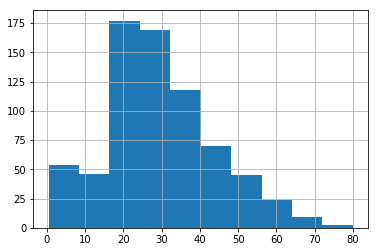

In [7]:
# The folloing plot shows the distribution of passenger ages excluding missing data
#%pylab inline
%matplotlib inline
import seaborn as sns
titanic['age'].hist()

We can see from the table that there is about 20% of data is missing from the 'Age' column (but the data is otherwise nearly normally distributed skewed to the right). This maybe due to the fact that not all data were collected. Since this percentage is a small portion of the dataset, we'll still go ahead use it for later analysis. However caution should be used when interpreting results from this criterion to generalize to the whole population (all the passengers aboard).

### Data Analysis

In this section, we first look at the overall survival rate. Then we'll compare this with survival rates by different criteria, including pclass(Passenger Class), sex, age, sibsp(Number of Siblings/Spouses Aboard), parch(Number of Parents/Children Aboard), fare(Passenger Fare), embarked(Port of Embarkation). The comparison of these rates will then shed light onto the answer to our question.

In [8]:
# Then we group the data by 'survived' to get the overall survival rate
titanic_by_survival = titanic.groupby('survived')
# Calculate the overall survival rate
pid_df = titanic_by_survival.agg({'passengerid' : 'size'})
pid_df / len(titanic)

,passengerid
survived,
0,0.616162
1,0.383838


So the overall survival rate among all the passengers is about 38%.

In [9]:
# We now find the survival rate by 'pclass'
(titanic.groupby(['pclass', 'survived']).count()/titanic.groupby(['pclass']).count())['passengerid']

pclass  survived
1       0           0.370370
        1           0.629630
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: passengerid, dtype: float64

In [10]:
# Another way of doing is to group by criterion and calculate the average for 'survived'. This makes our later visualization 
# easier to understand. So we'll then use this way to calculate.
titanic.groupby(['pclass'])['survived'].mean()

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

This clearly shows that the survival rate goes down from 63% in 1st class to 47% and 24%, for 2nd and 3rd class respectively, while both 1st and 2nd class have much higher survival rate than overall, 3rd class has lower than overall survival rate.  

In [11]:
# We'll define a function to calculate survival rates for different criteria to avoid rewriting the same code.
def calculate_survival_rates(criterion):
    return titanic.groupby([criterion])['survived'].mean()

In [12]:
# Survival rates by sex
calculate_survival_rates('sex')

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

The female group has a significantly higher percentage of 74% survived compared with the male of only 19%!

In [13]:
# Now, we'll find out survival rates based on age. This will be done by grouping age into 4 groups: child(~11), 
# youth(12~18), adult(19~59) and senior(60~) and adding a new categorical column "agegrp" with above lables.
titanic['agegrp'] =  pd.cut(titanic['age'], [0, 11, 18, 59, 100], labels=["child","youth","adult", "senior"])
titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,agegrp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult


In [14]:
# Now calculate the survival rate by age groups
calculate_survival_rates('agegrp')

agegrp
adult     0.387978
child     0.573529
senior    0.269231
youth     0.436620
Name: survived, dtype: float64

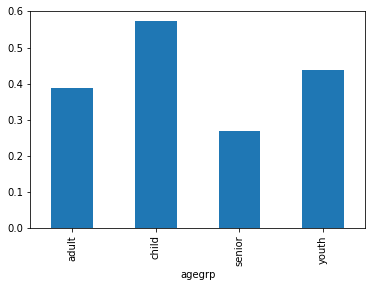

In [15]:
calculate_survival_rates('agegrp').plot(kind = 'bar')

The data tell us that younger passengers (child, youth) have higher than overall survival rates while adult has a little highter rate and senior has much lower survival rate.

sibsp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: survived, dtype: float64


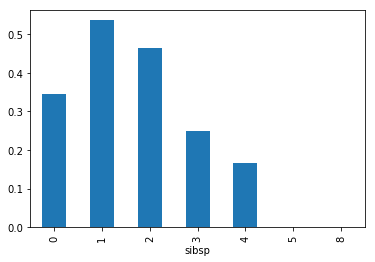

In [16]:
# Find survivate based on Number of Siblings/Spouses Aboard
print calculate_survival_rates('sibsp')
calculate_survival_rates('sibsp').plot(kind = 'bar')

There's clearly a realtionship between survival rate and the number of siblings aboard. Passengers with 2 or less siblings have an above overall survival rate, while passengers with 3 and more siblings have significantly lower rates. For those who have 5 and 8 siblings aboard, the survival rate is 0. 

In [17]:
# Calculate survivate rate by Number of Parents/Children Aboard
calculate_survival_rates('parch')

parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: survived, dtype: float64

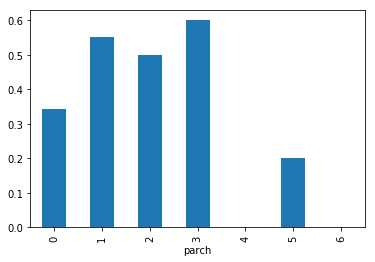

In [18]:
calculate_survival_rates('parch').plot(kind = 'bar')

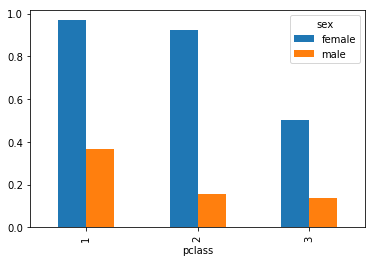

In [19]:
# Find the survival rates based on multiple levels of groups
titanic.groupby(['pclass', 'sex'])['survived'].agg('mean').unstack().plot(kind='bar')

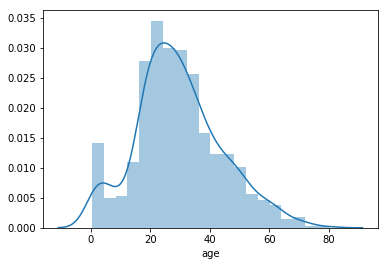

In [20]:
# Use Seaborn to visualize 
sns.distplot(titanic.age.dropna())
plt.show()

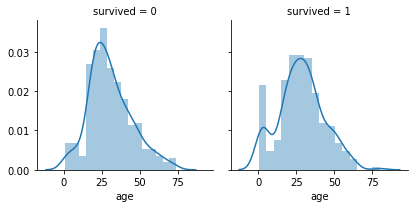

In [21]:
# Facet plot by survival
g = sns.FacetGrid(titanic, col='survived')
g.map(sns.distplot, 'age')
plt.show()

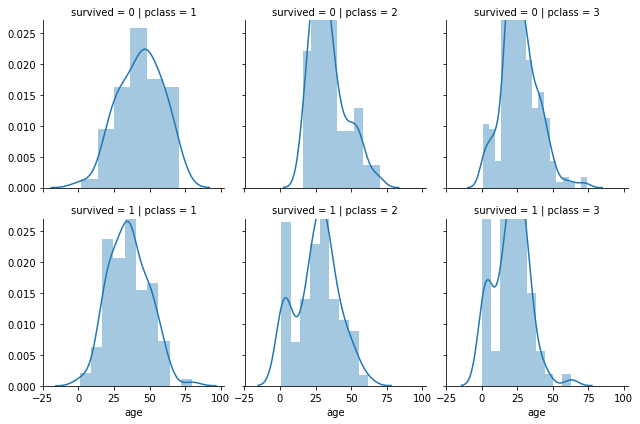

In [22]:
# Facet plot by survival and pclass
g = sns.FacetGrid(titanic, row='survived', col='pclass')
g.map(sns.distplot, 'age')
plt.show()

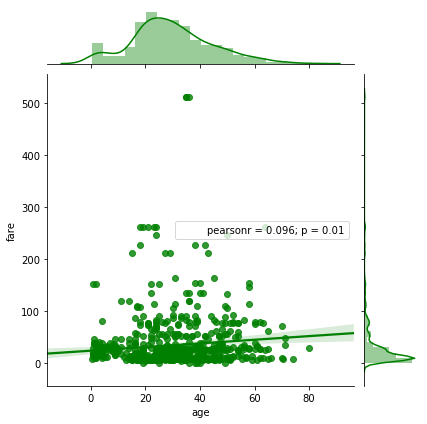

In [23]:
# Joint plot
sns.jointplot(data=titanic, x='age', y='fare', kind='reg', color='g')
plt.show()

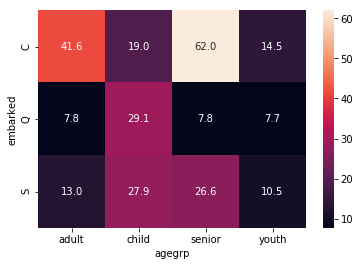

In [24]:
# Heat map
df = titanic.pivot_table(index='embarked', columns='agegrp', values='fare', aggfunc=np.median)
sns.heatmap(df, annot=True, fmt=".1f")

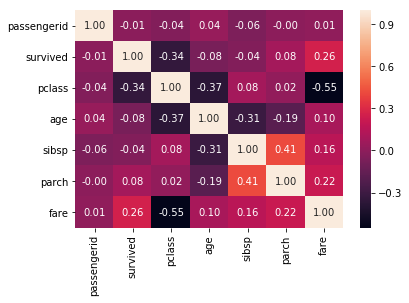

In [25]:
# Correlation Matrix
sns.heatmap(titanic.corr(), annot=True, fmt=".2f")

### Conclusion

In this study, we examined the survival rates across different criterion groups and compared with the overal survival rate. Based on the data, clearly, survival rates vary greatly for different criteria. Survivors from the Titanic disaster have one or more of the following characteristics, or put in another way, passengers with following attributes are more likely to survive:

* female
* children, youth and adult (59 years old and younger)
* having a total of 3 or less parents or child(ren) aboard
* having a total of 2 or less siblings or spouse aboard
* 1st or 2nd class passengers 

The conclusion we are drawing is not statistical inference from the data, as number of passengers on board was 1,317, while we only have data for 891 people. On the other hand, we also don't have any information about the randomness of the collection of the data, and the size would also be too large to be a representative sample (67% of all passengers). As a result, it is cautioned not to use the conclusion for the whole population of the passengers. Furthermore, no causal inference can be made based on this report as we only have observational data and no random assignment is involved.